In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
img = cv2.imread('images/scenic.jpg')
cv2.imshow('frame', img)
if cv2.waitKey(0) & 0xff == ord('q'):
    cv2.destroyAllWindows()

In [4]:
pix = img[100, 100] #pixel at 100th row and 100th column
pix

array([195, 199, 204], dtype=uint8)

In [6]:
blue =img[100, 100, 0]
print(blue)

195


In [7]:
#Can modify pixel value the same way
img[100, 100] = [255, 255, 255]
img[100, 100]

array([255, 255, 255], dtype=uint8)

In [8]:
#another way to access pixel values
img.item(10, 10, 2)#value of red layer(BGR)


0

In [9]:
img.itemset((10, 10, 2), 100)
img.item(10, 10, 2)

100

##### Image Properties

In [11]:
print(img.shape)
print(img.size) #total number of pixels
print(img.dtype)

(183, 276, 3)
151524
uint8


### Image Region of Interest

In [28]:
car = img[90:,  60:210]
img[:93, 60:210] = car #copyying the car in another region in the image
cv2.imshow('frame', img)
if cv2.waitKey(0) & 0xff == ord('q'):
    cv2.destroyAllWindows()

#### Splitting and Merging Image channels

In [29]:
b, g, r = cv2.split(img)
img = cv2.merge((b, g, r))


In [32]:
b = img[:, :, 0] #accessing the blue layer
cv2.imshow('frame', b)
if cv2.waitKey(0) & 0xff == ord('q'):
    cv2.destroyAllWindows()

>cv2.split() is a costly operation (in terms of time). So do it only if you need it. Otherwise go for Numpy indexing.

##### Making Borders for Images(Padding

You can use cv2.copyMakeBorder() function for creating a border. But it has more applications for convolution operation, zero padding etc. This function takes following arguments:

- src - input image

- top, bottom, left, right - border width in number of pixels in corresponding directions

- borderType - Flag defining what kind of border to be added. It can be following types:
 - cv2.BORDER_CONSTANT - Adds a constant colored border. The value should be given as next argument.
 - cv2.BORDER_REFLECT - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb
 - cv2.BORDER_REFLECT_101 or cv2.BORDER_DEFAULT - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba
 - cv2.BORDER_REPLICATE - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh
 - v2.BORDER_WRAP - Can’t explain, it will look like this : cdefgh|abcdefgh|abcdefg
- value - Color of border if border type is cv2.BORDER_CONSTANT

NameError: name 'RED' is not defined

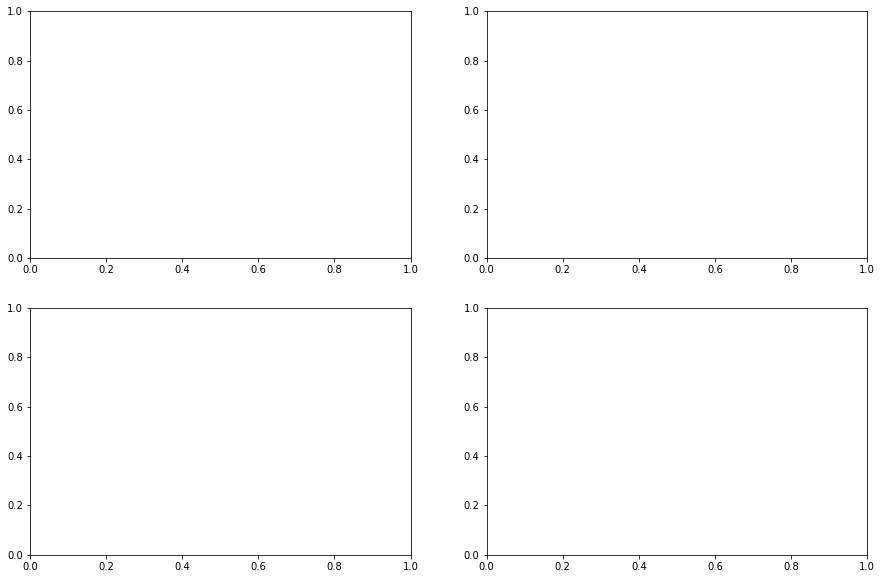

In [37]:
BLUE = [255,0,0]

img1 = cv2.imread('images/scenic.jpg')
plt.subplots(2,2,figsize=(15,10))
replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=RED)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()